In [22]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [23]:
mobile = pd.read_csv('mobile_price_train.csv')
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


해당 데이터는 핸드폰의 특성에 따라 가격대가 0(저렴), 1(중간), 2(비쌈), 3(매우 비쌈)으로 나눠진다. 

In [24]:
mobile.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

null값이 존재하지 않는 데이터셋이다.


In [25]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

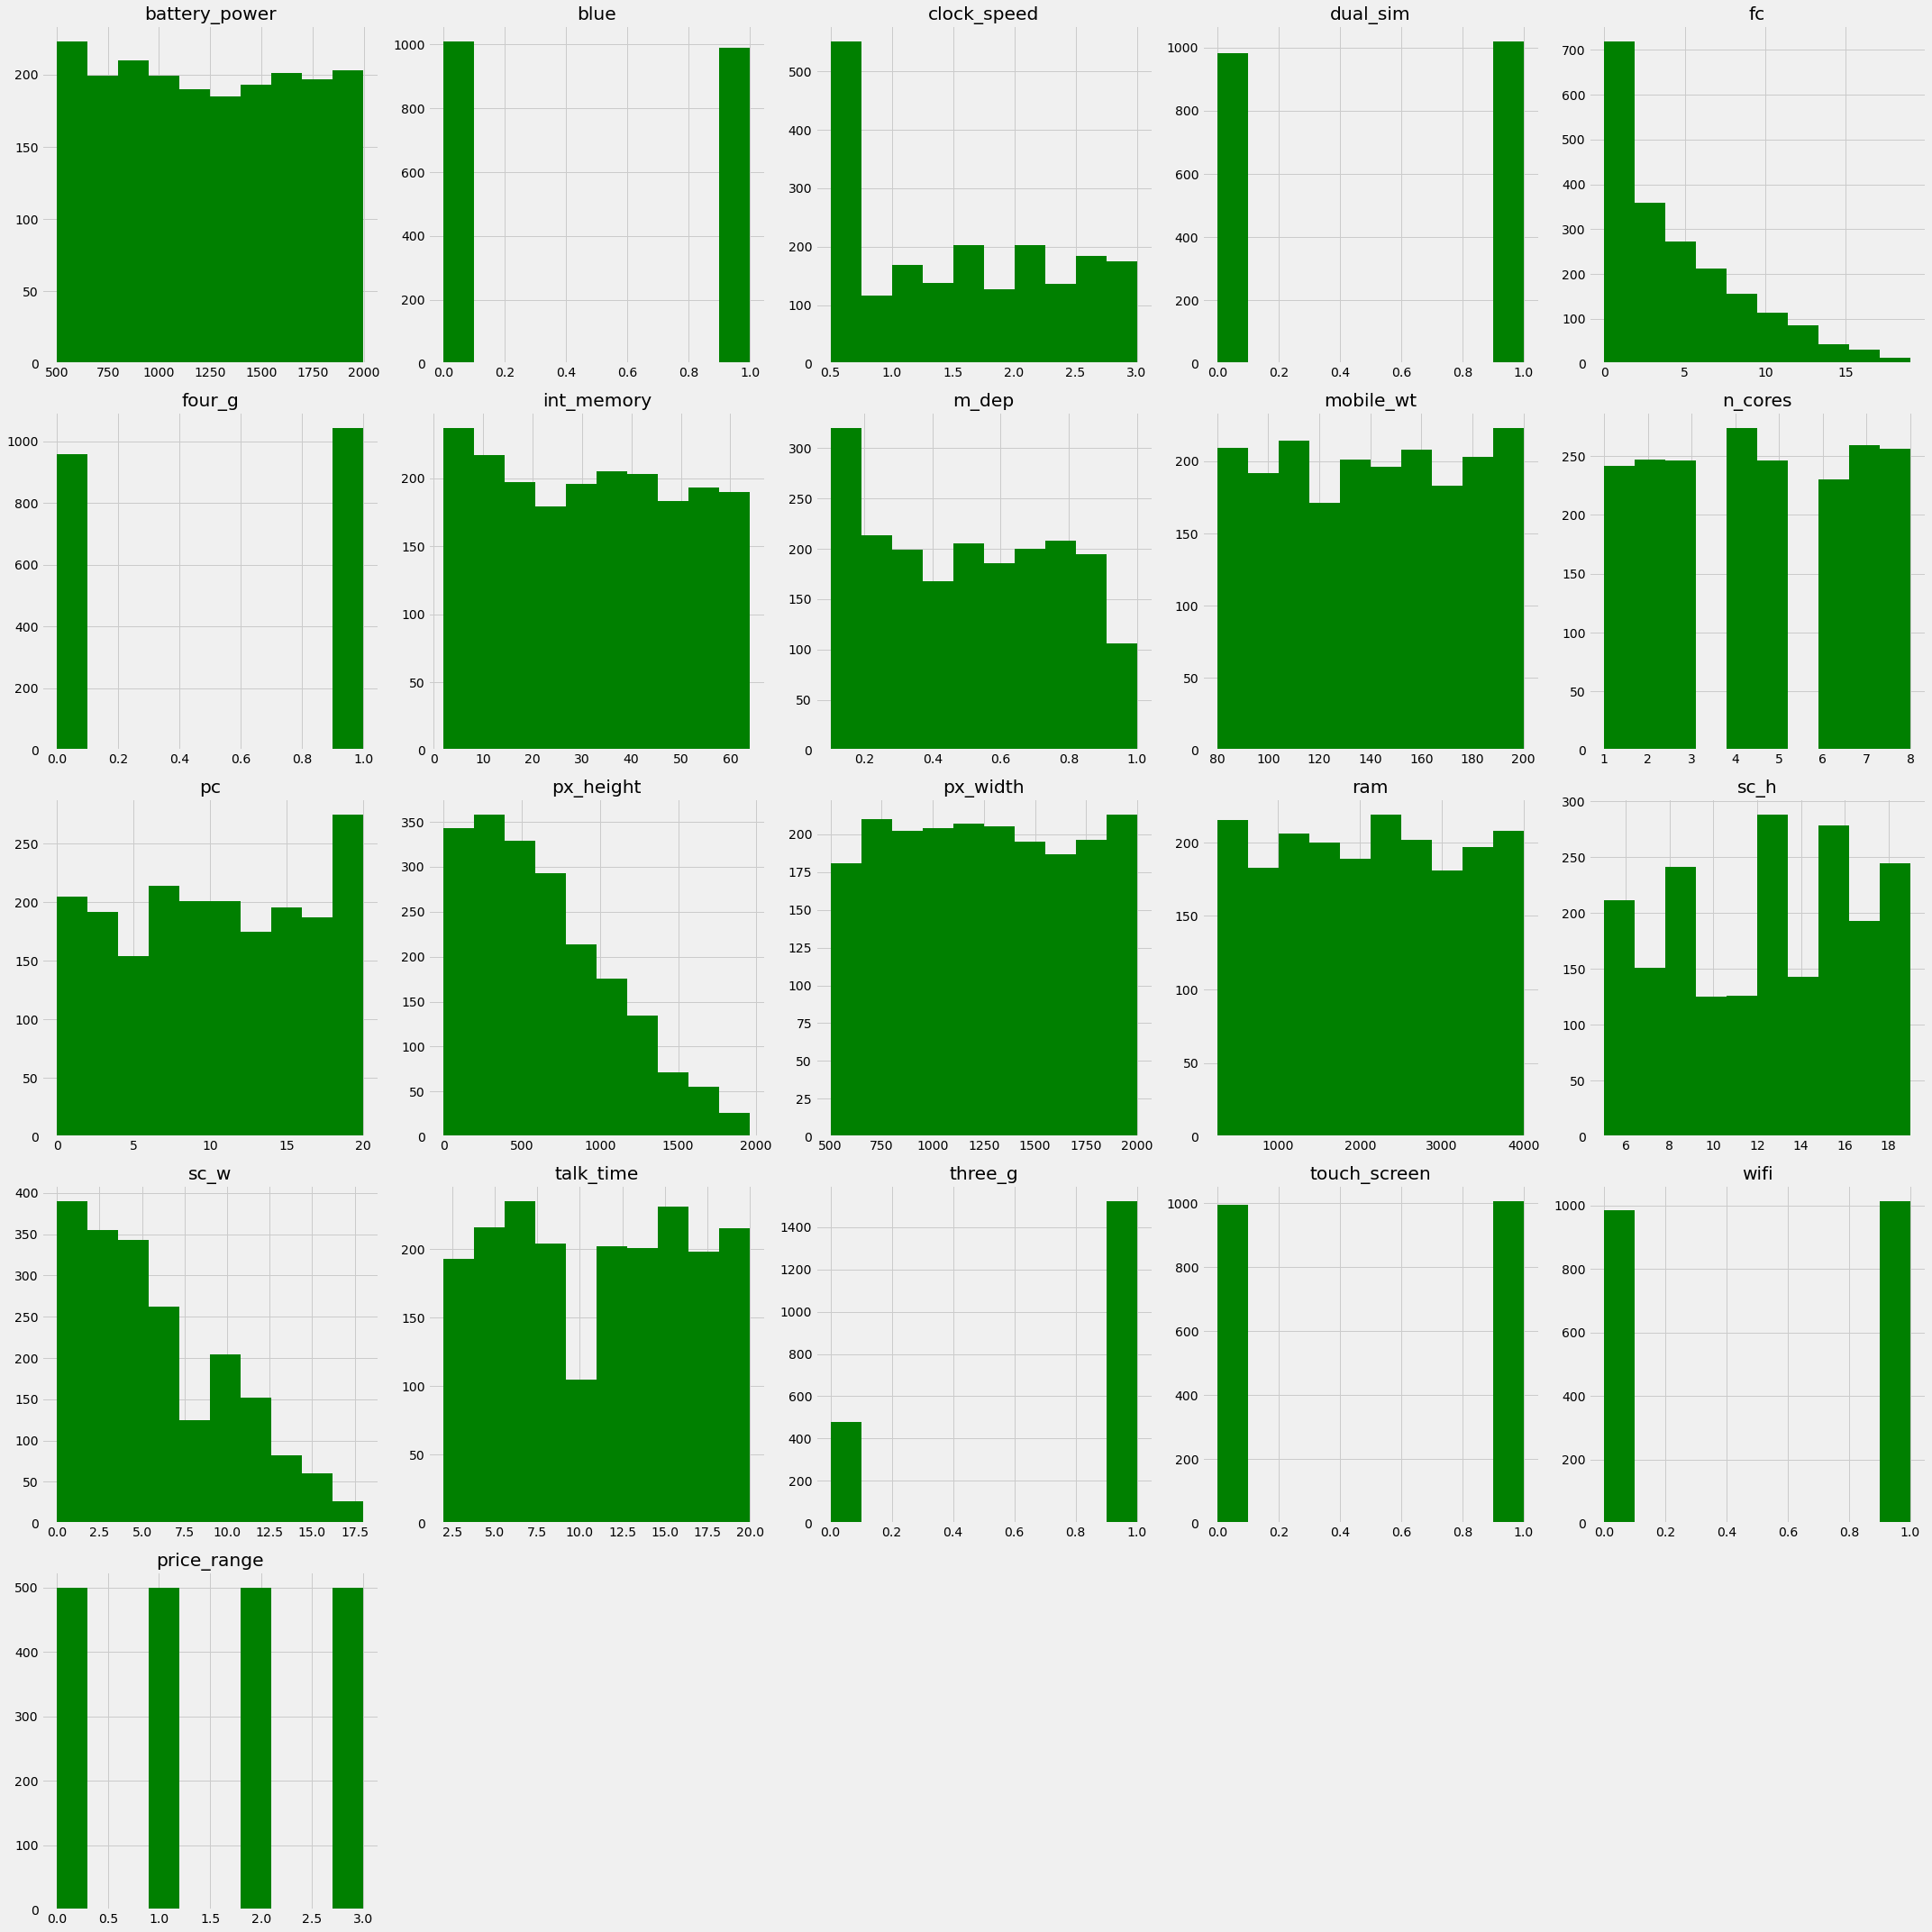

In [27]:
plt.figure(figsize=(30,30))
for i, col in enumerate(mobile.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(mobile[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

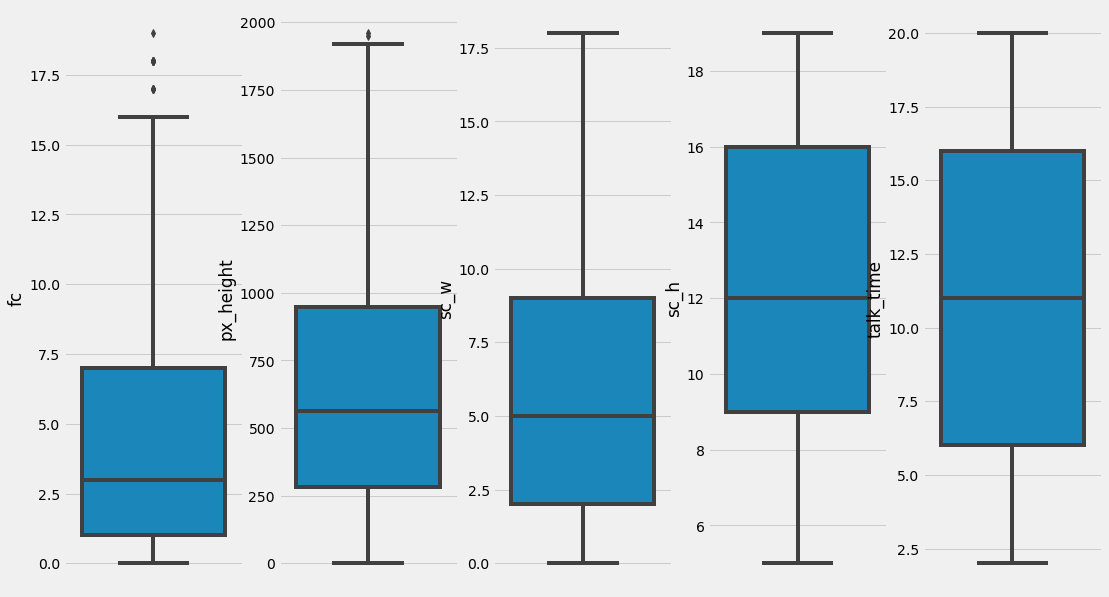

In [28]:
plt.figure(figsize=(20,10))
x = ['fc','px_height','sc_w','sc_h','talk_time']
count=0
for i in x:
    plt.subplot(1,6,count+1)
    sns.boxplot(data=mobile,y=i)
    count+=1

px_height, sc_w에 이상치가 발견된다. 이를 제거하도록 한다.

In [29]:
q1 = mobile['px_height'].quantile(0.25)
q2 = mobile['px_height'].quantile(0.75)
iqr = q2-q1

outlier = mobile['px_height']>q2+1.5*iqr

q3 = mobile['sc_w'].quantile(0.25)
q4 = mobile['sc_w'].quantile(0.75)
iqr_1 = q4 - q3

outlier_1 = mobile['sc_w'] > q4 + 1.5*iqr_1

mobile[outlier]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [30]:
index_1 = mobile[outlier].index
mobile.drop(index_1, inplace=True)

index_2 = mobile[outlier_1].index
mobile.drop(index_2, inplace = True)

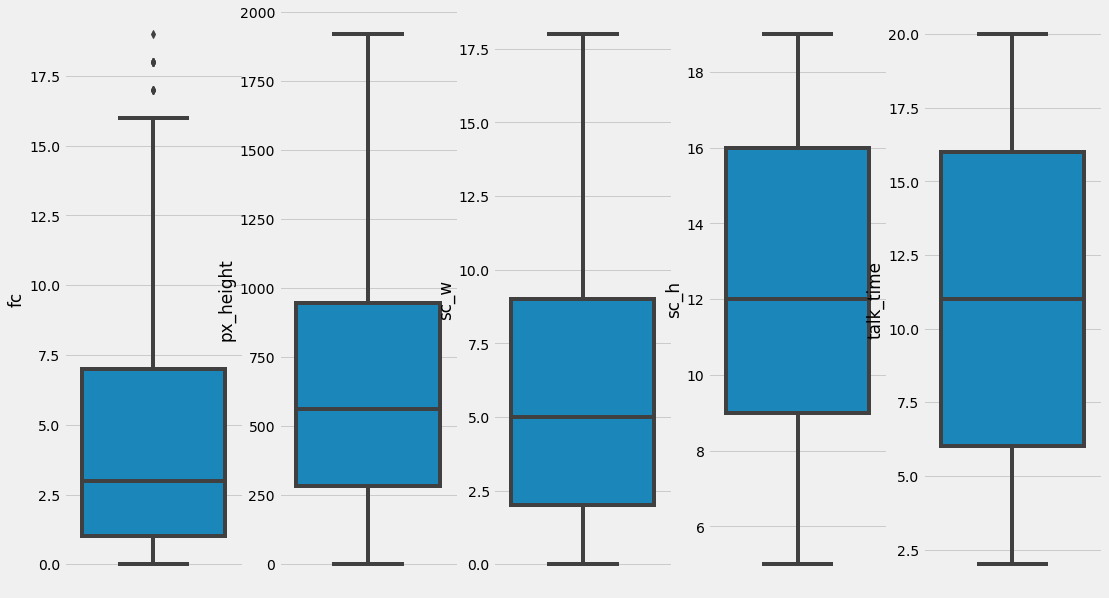

In [31]:
plt.figure(figsize=(20,10))
x = ['fc','px_height','sc_w','sc_h','talk_time']
count=0
for i in x:
    plt.subplot(1,6,count+1)
    sns.boxplot(data=mobile,y=i)
    count+=1

<AxesSubplot:>

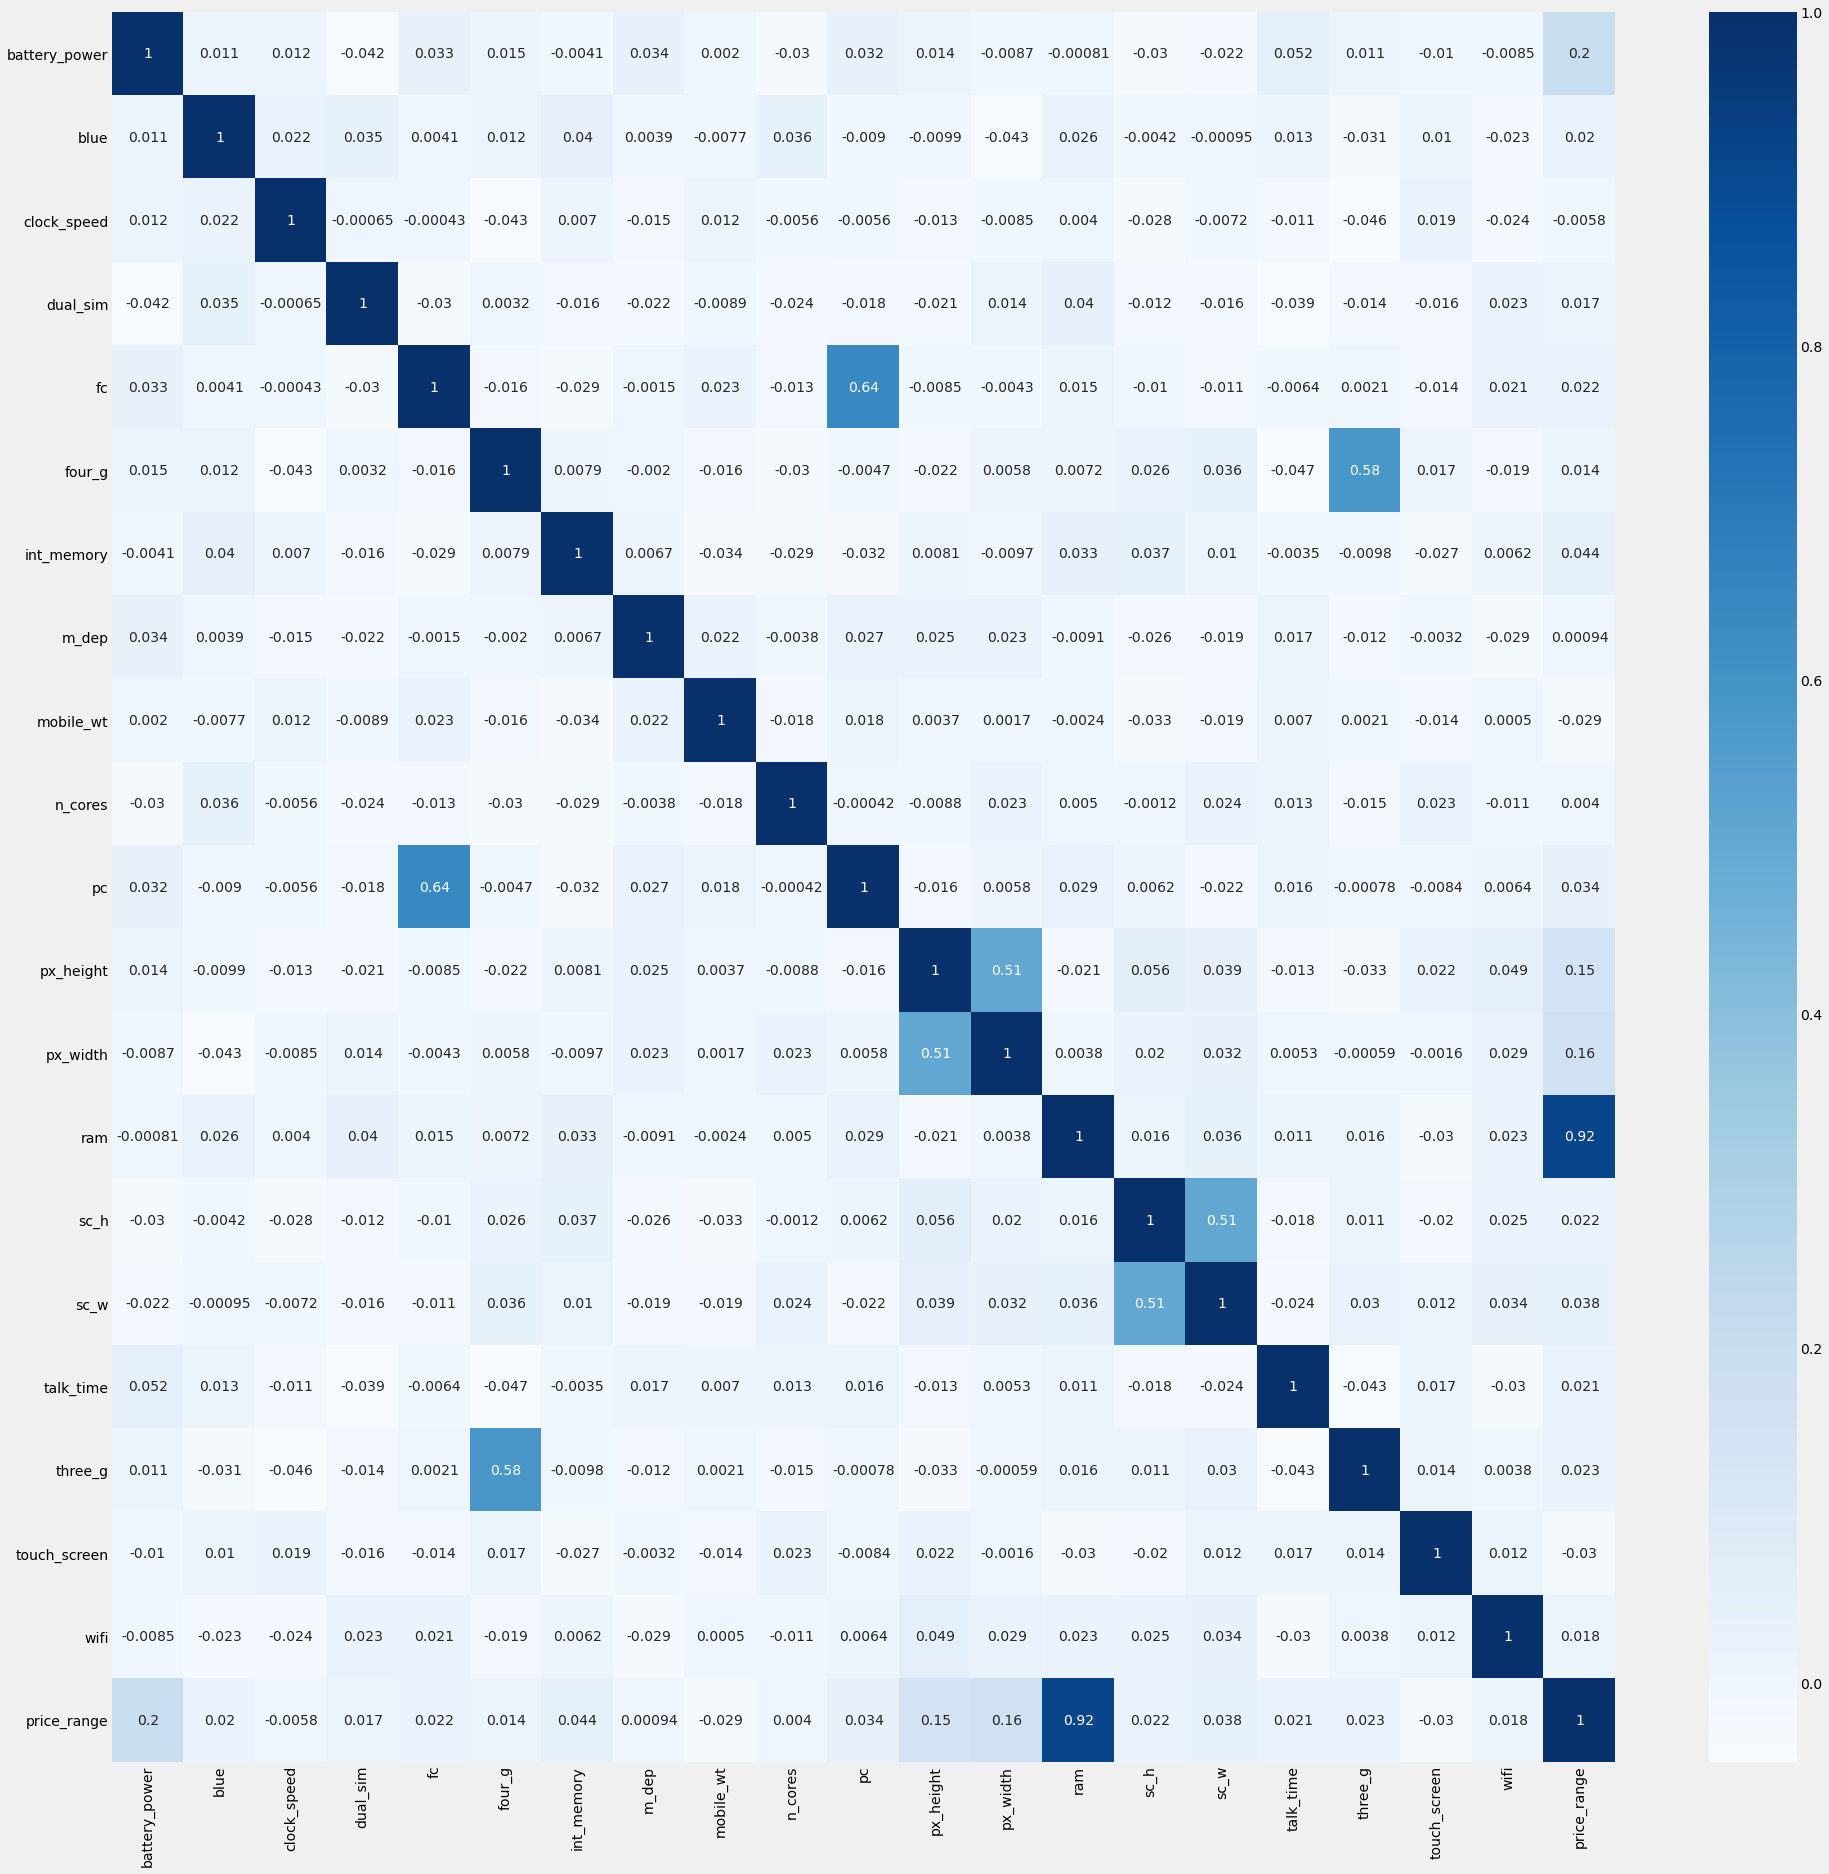

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(mobile.corr(), annot=True, cmap='Blues')

이 중 상관관계가 너무 높은 ram,price_range 중 하나를 제거한다.

In [34]:
mobile.drop(['ram'],axis=1,inplace=True)

<AxesSubplot:>

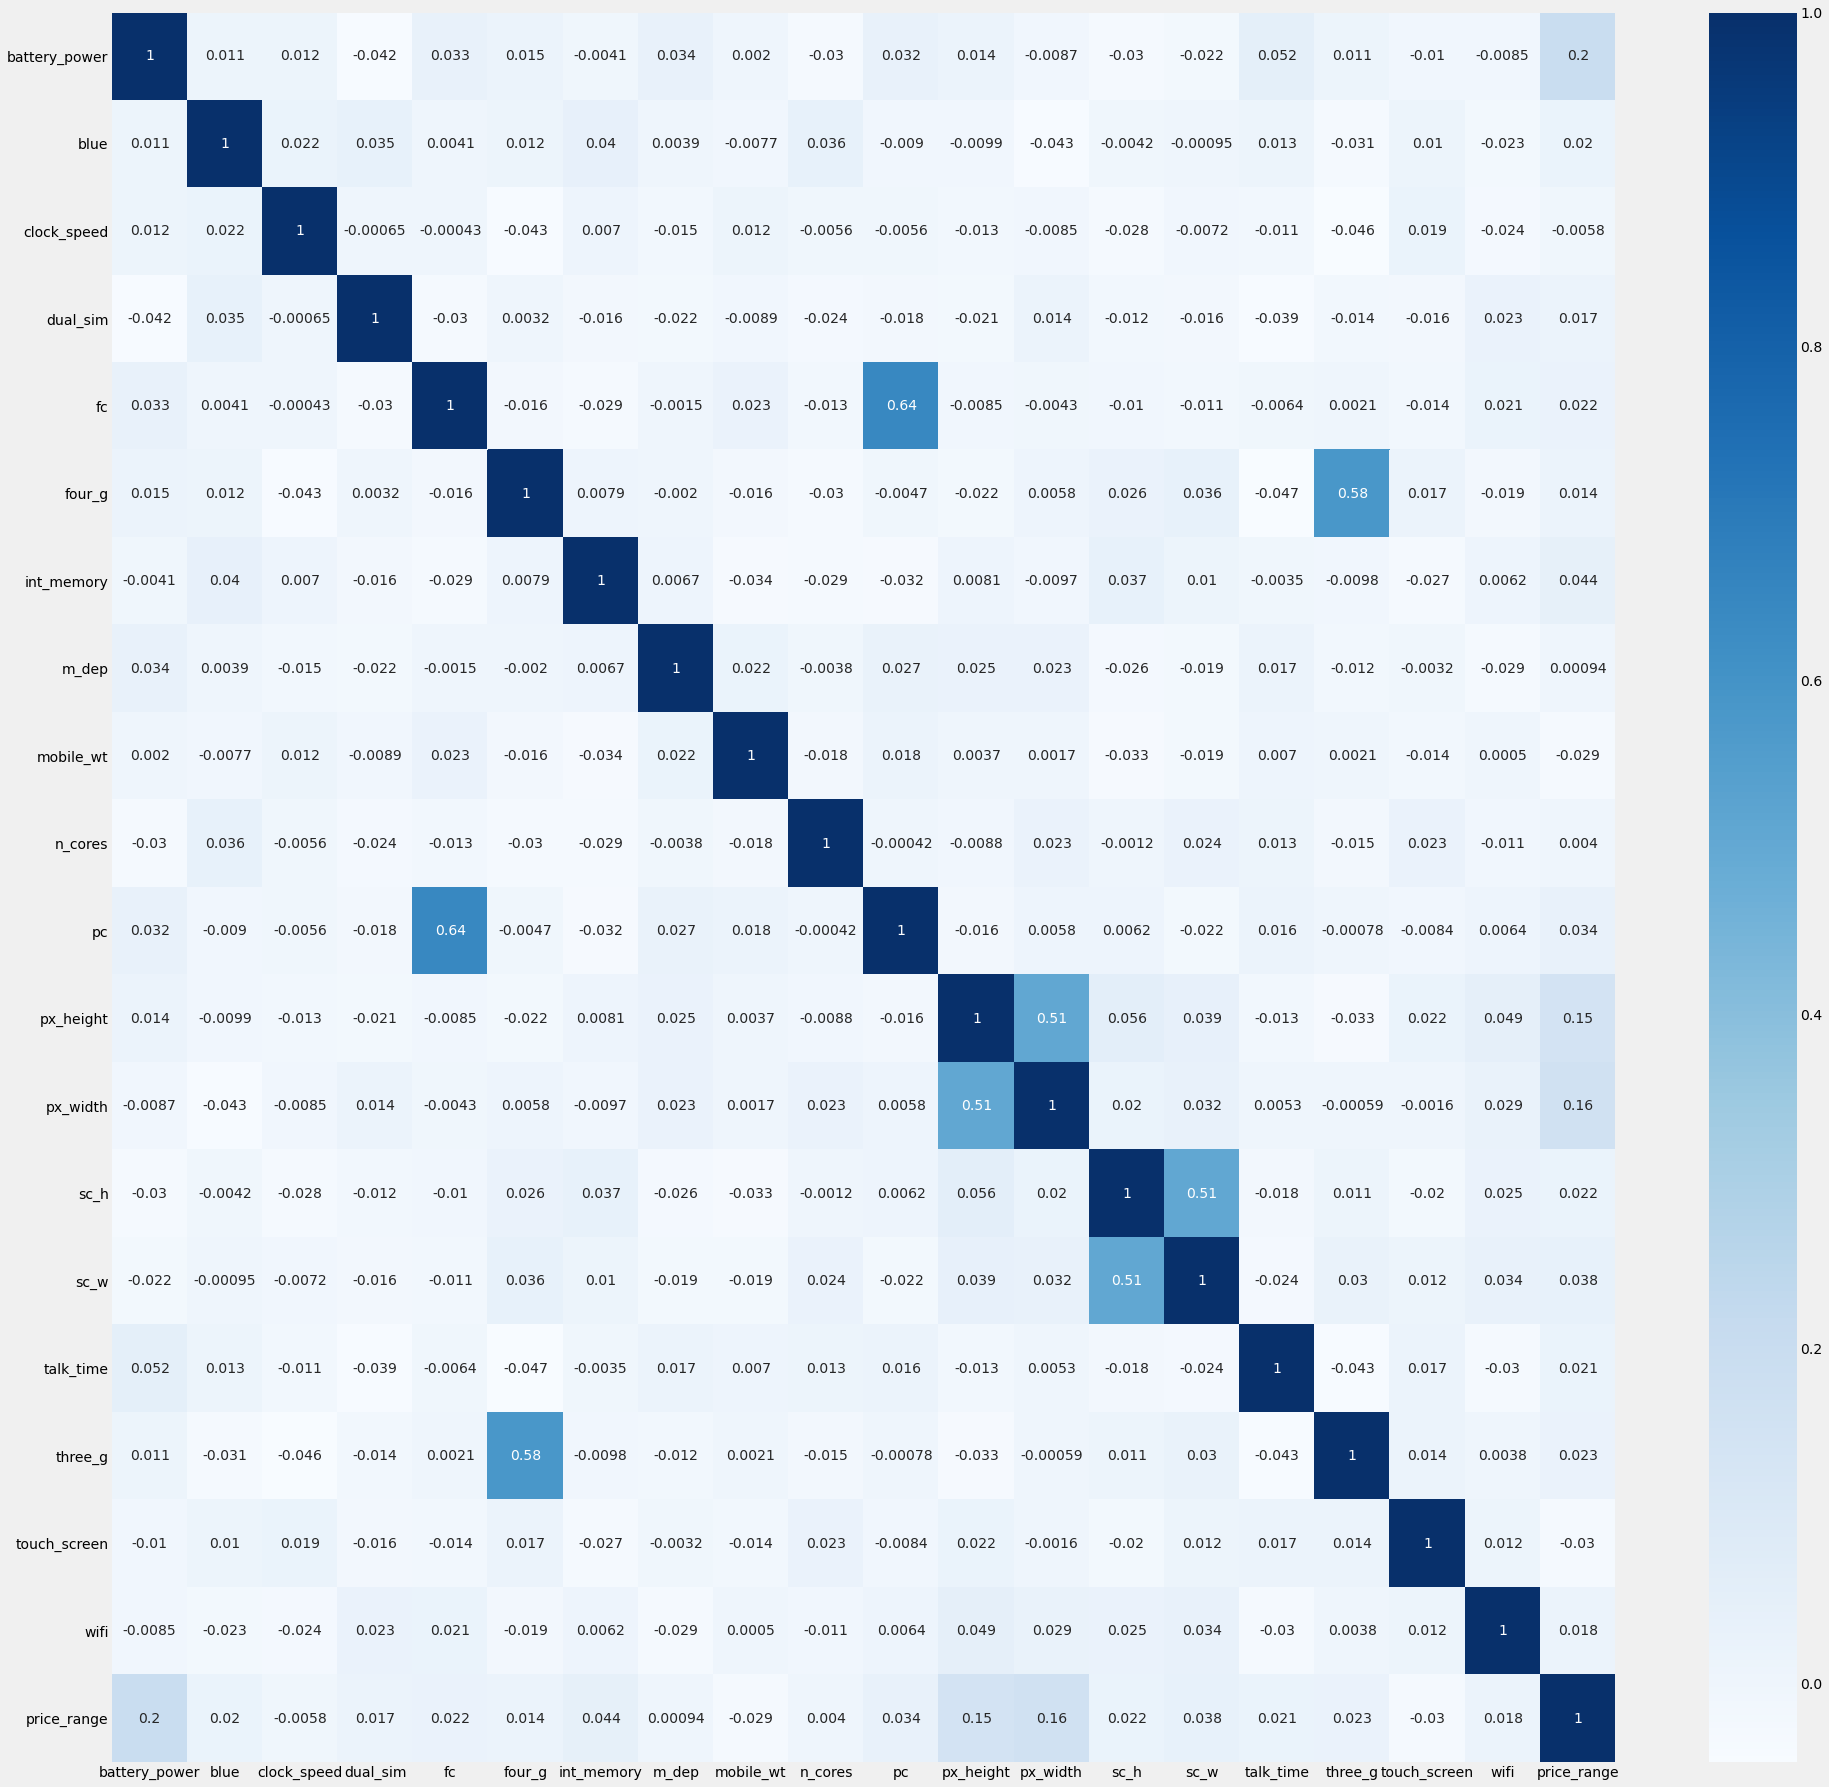

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(mobile.corr(), annot=True, cmap='Blues')